# Imports

In [353]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Aggregation

### Get season data
Get a list of the available season stats to aggregate data from player and advanced stats as well as team standings and mvp votes


In [354]:
#To do need to clean the markdown for this ipynb
def get_seasons():
    start_year = 2000
    end_year = 2022
    start_season = 1

    year_season_list = []

    for year in range(start_year, end_year + 1):
        # Calculate the season for the current year
        season = start_season + (year - start_year)
        # Format the year and season as strings and append to the list
        year_season_list.append(f"{year}_{season:02d}")
    return year_season_list

season_list = get_seasons()
season_list

['2000_01',
 '2001_02',
 '2002_03',
 '2003_04',
 '2004_05',
 '2005_06',
 '2006_07',
 '2007_08',
 '2008_09',
 '2009_10',
 '2010_11',
 '2011_12',
 '2012_13',
 '2013_14',
 '2014_15',
 '2015_16',
 '2016_17',
 '2017_18',
 '2018_19',
 '2019_20',
 '2020_21',
 '2021_22',
 '2022_23']

#### Merge CSVs
Group and merge each respected CSV and their type across all of its seasons


In [355]:
# Group all the datagrams from our data
def mergeData (data_folder, file_suffix):
# Group advanced stats
    combined_data = pd.DataFrame()

    for s in season_list:
        loc = f'data/{data_folder}/{s}_{file_suffix}.csv'
        if data_folder == "mvp_voting":
            columns_to_use = ['Player', 'Rank', 'Share']
            data =  pd.read_csv(loc,  usecols=columns_to_use)
        elif data_folder == "team_standings":
            columns_to_use = ['Team', 'Overall']
            data = pd.read_csv(loc,  usecols=columns_to_use)
        else:
            data = pd.read_csv(loc)
        data['season'] = s
        combined_data = pd.concat([combined_data, data], ignore_index=True)
    return combined_data

advanced_stats_df = mergeData("advanced_stats", "playerstats_advanced")
player_stats_df = mergeData("player_stats", "playerstats")
team_standings_df = mergeData("team_standings", "teamstandings")
mvp_voting_df = mergeData("mvp_voting", "mvpvoting")

# Remove trailing * from player names in the player_stats_df and advanced_stats_df
player_stats_df['Player'] = player_stats_df['Player'].str.replace('*', '')
advanced_stats_df['Player'] = advanced_stats_df['Player'].str.replace('*', '')

Drop any columns that overlap between different Data.cvs's, as data is quite similar across the various types of advanced stats, player stats and team standings. However, keep the columns that will allow the merging later

In [356]:
columns_advanced_stats_df = set(advanced_stats_df.columns)
columns_player_stats_df = set(player_stats_df.columns)
columns_team_standings_df = set(team_standings_df.columns)

common_columns_advanced_player = columns_advanced_stats_df.intersection(columns_player_stats_df)
common_columns_player_team = columns_player_stats_df.intersection(columns_team_standings_df)
common_columns_advanced_team = columns_advanced_stats_df.intersection(columns_team_standings_df)

if len(common_columns_advanced_player) > 1: #common between player and advanced
    print("common_columns_advanced_player = ", common_columns_advanced_player)
    advanced_stats_df.drop(columns = ['Age', 'Pos', 'G', 'MP', 'Rk'], axis = 1, inplace = True) #Keep player. TM (team) and season to enable the merging of data

if len(common_columns_player_team) > 1: #player and team standings
    print("common_columns_player_team = ", common_columns_player_team)

if len(common_columns_advanced_team) > 1: #advanced and team standings
    print("common_columns_advanced_team = ", common_columns_advanced_team)

print(advanced_stats_df.columns)

common_columns_advanced_player =  {'Player', 'Tm', 'MP', 'G', 'Age', 'season', 'Pos', 'Player-additional', 'Rk'}
Index(['Player', 'Tm', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'Unnamed: 19', 'OWS', 'DWS',
       'WS', 'WS/48', 'Unnamed: 24', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'Player-additional', 'season'],
      dtype='object')


### Remove Redundant Columns 
Remove any columns with little significance and/or dominated by NULLs

In [357]:
#Remove Null's for advanced_stats
null_adv = advanced_stats_df.isnull().sum()
print(null_adv) 
#Key null columns are Unamed:19 and Unamed:24 
advanced_stats_df.drop(columns= ['Unnamed: 19', 'Unnamed: 24'], axis = 1, inplace = True) #Keep player. TM (team) and season to enable the merging of data


Player                   0
Tm                       0
PER                      5
TS%                     79
3PAr                    83
FTr                     83
ORB%                     5
DRB%                     5
TRB%                     5
AST%                     5
STL%                     5
BLK%                     5
TOV%                    66
USG%                     5
Unnamed: 19          13927
OWS                      0
DWS                      0
WS                       0
WS/48                    5
Unnamed: 24          13927
OBPM                     0
DBPM                     0
BPM                      0
VORP                     0
Player-additional        0
season                   0
dtype: int64


In [358]:
#Remove Null's for player_stats
null_player_stats = player_stats_df.isnull().sum()
print(null_player_stats) #No signficiant columns with null values or high count of nulls

Rk                      0
Player                  0
Pos                     0
Age                     0
Tm                      0
G                       0
GS                      0
MP                      0
FG                      0
FGA                     0
FG%                    83
3P                      0
3PA                     0
3P%                  1930
2P                      0
2PA                     0
2P%                   152
eFG%                   83
FT                      0
FTA                     0
FT%                   716
ORB                     0
DRB                     0
TRB                     0
AST                     0
STL                     0
BLK                     0
TOV                     0
PF                      0
PTS                     0
Player-additional       0
season                  0
dtype: int64


In [359]:
#Remove Null's for team standings
null_team_standings = team_standings_df.isnull().sum()
print(null_team_standings) #No signficiant columns with null values or high count of nulls

Team       0
Overall    0
season     0
dtype: int64


In [360]:
# Based on an anlyasis of the csv data, the rk column can be removed as its a numercial value that provided no value and could confuse the model
# Remove rank for player_stats as well, team rank does matter as we can guage who the best team is
player_stats_df.drop(columns= ['Rk'], axis = 1, inplace = True) 

### Merge data into one centralized dataframe across both advanced and player stats

In [361]:
#Left join, must keep player_stats and only merge data if it only corresponds to one row
total_data_df = player_stats_df.merge(advanced_stats_df, on=['Player', 'season', 'Tm'], how ='left')
total_data_df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional_x,season,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Player-additional_y
0,Mahmoud Abdul-Rauf,PG,31,VAN,41,0,11.9,2.9,6.0,0.488,0.1,0.3,0.286,2.8,5.7,0.500,0.496,0.5,0.7,0.759,0.1,0.5,0.6,1.9,0.2,0.0,0.6,1.2,6.5,abdulma02,2000_01,16.7,0.514,0.057,0.118,1.2,4.7,2.9,32.7,1.0,0.1,9.1,26.8,0.7,0.0,0.7,0.070,1.1,-2.1,-1.0,0.1,abdulma02
1,Tariq Abdul-Wahad,SG,26,DEN,29,12,14.5,1.5,3.8,0.387,0.1,0.3,0.400,1.3,3.5,0.386,0.405,0.7,1.2,0.583,0.5,1.6,2.0,0.8,0.5,0.4,1.2,1.9,3.8,abdulta01,2000_01,5.8,0.438,0.090,0.324,3.6,11.8,7.6,8.1,1.7,2.1,21.1,17.1,-0.7,0.3,-0.4,-0.049,-5.6,-0.3,-5.8,-0.4,abdulta01
2,Shareef Abdur-Rahim,SF,24,VAN,81,81,40.0,7.5,15.8,0.472,0.1,0.8,0.188,7.3,15.0,0.487,0.477,5.5,6.6,0.834,2.2,6.9,9.1,3.1,1.1,1.0,2.9,2.9,20.5,abdursh01,2000_01,19.1,0.549,0.050,0.415,6.2,19.6,13.0,14.3,1.5,1.6,13.2,24.6,5.6,2.9,8.5,0.126,1.7,0.1,1.8,3.1,abdursh01
3,Cory Alexander,PG,27,ORL,26,0,8.7,0.7,2.2,0.321,0.2,0.6,0.250,0.5,1.5,0.350,0.357,0.5,0.7,0.667,0.0,1.0,1.0,1.4,0.6,0.0,1.0,1.1,2.0,alexaco01,2000_01,6.3,0.407,0.286,0.321,0.0,12.5,6.1,23.5,3.6,0.0,28.1,17.3,-0.5,0.3,-0.1,-0.031,-7.2,1.2,-6.0,-0.2,alexaco01
4,Courtney Alexander,PG,23,TOT,65,24,21.3,3.7,8.8,0.417,0.3,0.7,0.370,3.4,8.1,0.421,0.432,1.9,2.3,0.820,0.6,1.6,2.2,1.0,0.7,0.1,1.2,2.1,9.5,alexaco02,2000_01,11.6,0.484,0.080,0.262,3.5,8.4,5.9,8.0,1.7,0.3,10.5,23.2,0.3,0.5,0.8,0.027,-2.4,-1.9,-4.3,-0.8,alexaco02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13922,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,0.545,0.1,0.6,0.176,1.9,3.0,0.622,0.561,0.3,0.5,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4,youngth01,2022_23,14.1,0.573,0.172,0.131,9.4,14.6,11.8,12.9,3.4,0.6,16.7,13.5,0.7,1.1,1.8,0.109,-1.8,1.9,0.1,0.4,youngth01
13923,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,0.429,2.1,6.3,0.335,6.1,12.7,0.476,0.485,7.8,8.8,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2,youngtr01,2022_23,22.0,0.573,0.331,0.460,2.4,7.0,4.7,42.5,1.5,0.3,15.2,32.6,5.3,1.4,6.7,0.126,5.3,-2.0,3.3,3.4,youngtr01
13924,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,0.593,0.3,0.8,0.429,1.4,2.2,0.650,0.648,0.6,0.7,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4,yurtsom01,2022_23,16.7,0.675,0.259,0.222,10.9,21.9,16.2,3.9,1.2,2.5,11.9,18.0,0.2,0.1,0.3,0.159,-2.5,-1.5,-3.9,0.0,yurtsom01
13925,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,0.627,0.0,0.1,0.000,2.5,3.8,0.649,0.627,1.6,2.3,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5,zelleco01,2022_23,16.4,0.659,0.034,0.593,13.0,21.8,17.3,7.2,0.7,1.9,15.8,18.1,0.4,0.3,0.7,0.147,-2.0,-0.7,-2.8,0.0,zelleco01


### Merge MVP winner and voting share


In [362]:
# print(total_data_df.columns)
# print(mvp_voting_df.columns)
#print(mvp_voting_df)

#left merge many to 1 as not all keys are unique
total_data_df = total_data_df.merge(mvp_voting_df, how='left').fillna(0) # merges by default on columns: 'Player' and 'season'
print(total_data_df.columns)


Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Player-additional_x', 'season', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Player-additional_y',
       'Rank', 'Share'],
      dtype='object')


In [363]:
total_data_df.drop(columns= ['Player-additional_y'], axis = 1, inplace = True) 

# Rename 'Player-additional_x' as 'id'
total_data_df.rename(columns = {'Player-additional_x': 'id'}, inplace = True)

In [364]:
print(total_data_df.columns)
pd.options.display.max_columns = None

total_data_df.head()


Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'id', 'season',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'Rank', 'Share'],
      dtype='object')


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,id,season,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Rank,Share
0,Mahmoud Abdul-Rauf,PG,31,VAN,41,0,11.9,2.9,6.0,0.488,0.1,0.3,0.286,2.8,5.7,0.500,0.496,0.5,0.7,0.759,0.1,0.5,0.6,1.9,0.2,0.0,0.6,1.2,6.5,abdulma02,2000_01,16.7,0.514,0.057,0.118,1.2,4.7,2.9,32.7,1.0,0.1,9.1,26.8,0.7,0.0,0.7,0.070,1.1,-2.1,-1.0,0.1,0,0.0
1,Tariq Abdul-Wahad,SG,26,DEN,29,12,14.5,1.5,3.8,0.387,0.1,0.3,0.400,1.3,3.5,0.386,0.405,0.7,1.2,0.583,0.5,1.6,2.0,0.8,0.5,0.4,1.2,1.9,3.8,abdulta01,2000_01,5.8,0.438,0.090,0.324,3.6,11.8,7.6,8.1,1.7,2.1,21.1,17.1,-0.7,0.3,-0.4,-0.049,-5.6,-0.3,-5.8,-0.4,0,0.0
2,Shareef Abdur-Rahim,SF,24,VAN,81,81,40.0,7.5,15.8,0.472,0.1,0.8,0.188,7.3,15.0,0.487,0.477,5.5,6.6,0.834,2.2,6.9,9.1,3.1,1.1,1.0,2.9,2.9,20.5,abdursh01,2000_01,19.1,0.549,0.050,0.415,6.2,19.6,13.0,14.3,1.5,1.6,13.2,24.6,5.6,2.9,8.5,0.126,1.7,0.1,1.8,3.1,0,0.0
3,Cory Alexander,PG,27,ORL,26,0,8.7,0.7,2.2,0.321,0.2,0.6,0.250,0.5,1.5,0.350,0.357,0.5,0.7,0.667,0.0,1.0,1.0,1.4,0.6,0.0,1.0,1.1,2.0,alexaco01,2000_01,6.3,0.407,0.286,0.321,0.0,12.5,6.1,23.5,3.6,0.0,28.1,17.3,-0.5,0.3,-0.1,-0.031,-7.2,1.2,-6.0,-0.2,0,0.0
4,Courtney Alexander,PG,23,TOT,65,24,21.3,3.7,8.8,0.417,0.3,0.7,0.370,3.4,8.1,0.421,0.432,1.9,2.3,0.820,0.6,1.6,2.2,1.0,0.7,0.1,1.2,2.1,9.5,alexaco02,2000_01,11.6,0.484,0.080,0.262,3.5,8.4,5.9,8.0,1.7,0.3,10.5,23.2,0.3,0.5,0.8,0.027,-2.4,-1.9,-4.3,-0.8,0,0.0


### Merge Team Record for every season

In [365]:
# Replace team names in team_standings_df with team codes
team_codes = {
    'Atlanta Hawks': 'ATL',
    'Boston Celtics': 'BOS',
    'Charlotte Hornets': 'CHA',
    'Chicago Bulls': 'CHI',
    'Cleveland Cavaliers': 'CLE',
    'Dallas Mavericks': 'DAL',
    'Denver Nuggets': 'DEN',
    'Detroit Pistons': 'DET',
    'Golden State Warriors': 'GSW',
    'Houston Rockets': 'HOU',
    'Indiana Pacers': 'IND',
    'Los Angeles Clippers': 'LAC',
    'Los Angeles Lakers': 'LAL',
    'Memphis Grizzlies': 'MEM',
    'Miami Heat': 'MIA',
    'Milwaukee Bucks': 'MIL',
    'Minnesota Timberwolves': 'MIN',
    'New Orleans Pelicans': 'NOP',
    'New York Knicks': 'NYK',
    'Brooklyn Nets': 'BKN',
    'Oklahoma City Thunder': 'OKC',
    'Orlando Magic': 'ORL',
    'Philadelphia 76ers': 'PHI',
    'Phoenix Suns': 'PHO',
    'Portland Trail Blazers': 'POR',
    'Sacramento Kings': 'SAC',
    'San Antonio Spurs': 'SAS',
    'Toronto Raptors': 'TOR',
    'Utah Jazz': 'UTA',
    'Washington Wizards': 'WAS',

    'Seattle SuperSonics': 'OKC',   # Team moved to Oklahoma City in 2008 [this will be replaced with OKC]
    'Vancouver Grizzlies': 'MEM',   # Team moved to Memphis in 2001       [this will be replaced with MEM]
    'New Jersey Nets': 'BKN',       # Team moved to Brooklyn in 2012      [this will be replaced with BKN]
    'Charlotte Bobcats': 'CHA',     # Team name changed to Charlotte Hornets in 2014                [this will not be replaced, since it's the same name]
    'New Orleans Hornets': 'NOP',   # Team name changed to New Orleans Pelicans in 2013             [this will be replaced with NOP]
    'New Orleans/Oklahoma City Hornets': 'NOP',  # Team name changed to New Orleans Hornets in 2007 [this will be replaced with NOP]
}

team_standings_df['Team'] = team_standings_df['Team'].map(team_codes)

# Dictionary to replace old team codes with modern team codes
modern_team_codes = {
    'BRK': 'BKN',
    'SEA': 'OKC',
    'VAN': 'MEM',
    'NJN': 'BKN',
    'NOH': 'NOP',
    'NOK': 'NOP',
    'CHH': 'CHA',
    'UTH': 'UTA',
    'CHO': 'CHA',
}

# Replace total_data_df with modern team names
total_data_df['Tm'] = total_data_df['Tm'].replace(modern_team_codes)

# Replace teamstandings with modern team names
team_standings_df['Team'] = team_standings_df['Team'].replace(modern_team_codes)

# Merge team standings with total_data_df
team_standings_df.rename(columns={'Team': 'Tm'}, inplace=True)
total_data_df = total_data_df.merge(team_standings_df, how='left')      # merges by default on columns: 'Tm' and 'season'

# Find Nikola Jokic data
jokic_df = total_data_df[total_data_df['Player'] == 'Nikola Jokić']
jokic_df


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,id,season,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Rank,Share,Overall
8823,Nikola Jokić,C,20,DEN,80,55,21.7,3.8,7.5,0.512,0.4,1.1,0.333,3.5,6.5,0.541,0.535,1.9,2.4,0.811,2.3,4.7,7.0,2.4,1.0,0.6,1.3,2.6,10.0,jokicni01,2015_16,21.5,0.582,0.140,0.317,11.4,24.7,17.9,18.1,2.3,2.3,13.2,19.9,4.5,2.2,6.7,0.185,2.6,1.3,3.9,2.6,0,0.000,33-49
9398,Nikola Jokić,C,21,DEN,73,59,27.9,6.8,11.7,0.578,0.6,1.9,0.324,6.2,9.8,0.628,0.605,2.6,3.1,0.825,2.9,6.9,9.8,4.9,0.8,0.8,2.3,2.9,16.7,jokicni01,2016_17,26.3,0.640,0.163,0.267,11.6,27.2,19.5,28.8,1.5,2.1,15.2,23.5,7.7,2.0,9.7,0.228,5.9,1.4,7.3,4.8,0,0.000,40-42
10033,Nikola Jokić,C,22,DEN,75,73,32.6,6.7,13.5,0.499,1.5,3.7,0.396,5.2,9.7,0.538,0.554,3.5,4.2,0.850,2.6,8.1,10.7,6.1,1.2,0.8,2.8,2.8,18.5,jokicni01,2017_18,24.4,0.603,0.277,0.310,9.0,27.9,18.5,29.6,1.8,2.1,15.5,24.2,7.8,2.9,10.7,0.211,5.3,1.6,6.9,5.5,0,0.000,46-36
10728,Nikola Jokić,C,23,DEN,80,80,31.3,7.7,15.1,0.511,1.0,3.4,0.307,6.7,11.7,0.569,0.545,3.6,4.4,0.821,2.9,8.0,10.8,7.3,1.4,0.7,3.1,2.9,20.1,jokicni01,2018_19,26.3,0.589,0.224,0.292,9.8,27.6,18.7,37.0,2.1,1.9,15.4,27.4,7.5,4.3,11.8,0.226,6.2,2.9,9.1,7.0,4,0.210,54-28
11415,Nikola Jokić,C,24,DEN,73,73,32.0,7.7,14.7,0.528,1.1,3.5,0.314,6.6,11.2,0.594,0.565,3.4,4.1,0.817,2.3,7.5,9.7,7.0,1.2,0.6,3.1,3.0,19.9,jokicni01,2019_20,24.9,0.605,0.238,0.281,8.0,26.1,17.1,35.2,1.8,1.7,15.8,26.6,6.7,3.1,9.8,0.202,5.5,2.0,7.4,5.5,9,0.018,46-27
12075,Nikola Jokić,C,25,DEN,72,72,34.6,10.2,18.0,0.566,1.3,3.3,0.388,8.9,14.7,0.606,0.602,4.8,5.5,0.868,2.8,8.0,10.8,8.3,1.3,0.7,3.1,2.7,26.4,jokicni01,2020_21,31.3,0.647,0.183,0.305,9.4,26.1,17.8,40.4,1.9,1.9,13.1,29.6,12.2,3.4,15.6,0.301,9.1,3.0,12.1,8.8,1,0.961,47-25
12827,Nikola Jokić,C,26,DEN,74,74,33.5,10.3,17.7,0.583,1.3,3.9,0.337,9.0,13.8,0.652,0.620,5.1,6.3,0.810,2.8,11.0,13.8,7.9,1.5,0.9,3.8,2.6,27.1,jokicni01,2021_22,32.8,0.661,0.220,0.357,9.6,35.5,23.0,42.6,2.2,2.3,15.6,31.9,10.8,4.5,15.2,0.296,9.2,4.5,13.7,9.8,1,0.875,48-34
13566,Nikola Jokić,C,27,DEN,69,69,33.7,9.4,14.8,0.632,0.8,2.2,0.383,8.5,12.7,0.675,0.660,4.9,6.0,0.822,2.4,9.4,11.8,9.8,1.3,0.7,3.6,2.5,24.5,jokicni01,2022_23,31.5,0.701,0.146,0.406,8.5,31.3,20.2,46.6,1.8,1.8,17.0,27.2,11.2,3.8,14.9,0.308,8.5,4.5,13.0,8.8,2,0.674,53-29


# Data Sanitization

### Renaming Columns

In [366]:
# List all the columns
total_data_df.columns


Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'id', 'season',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'Rank', 'Share', 'Overall'],
      dtype='object')

In [367]:
# rename Rank to MVP_Rank
total_data_df.rename(columns={'Rank': 'MVP_Rnk'}, inplace=True)

# rename Overall to Team_Record
total_data_df.rename(columns={'Overall': 'Tm_Rcrd'}, inplace=True)

# rename Share to MVP_Share
total_data_df.rename(columns={'Share': 'MVP_Shr'}, inplace=True)
mvp_voting_df.rename(columns={'Share': 'MVP_Shr'}, inplace=True)


# rename season to Szn
total_data_df.rename(columns={'season': 'Szn'}, inplace=True)
mvp_voting_df.rename(columns={'season': 'Szn'}, inplace=True)


# rename Player to Plyr
total_data_df.rename(columns={'Player': 'Plyr'}, inplace=True)
mvp_voting_df.rename(columns={'Player': 'Plyr'}, inplace=True)


In [368]:
# list all the colums with Nulls in them
null_counts = total_data_df.isnull().sum()
null_counts[null_counts > 0]

Tm_Rcrd    1374
dtype: int64

### Getting Rid of Duplicates
These are players that play for multiple teams in the same season. Their name appear multiple times in a season, but have never won an MVP, so we can remove them

In [369]:
# Remove players who's name appears multiple times in the same season
total_data_df.drop_duplicates(subset=['id', 'Szn'], keep=False, inplace=True)

# Show that nulls are now gone
null_counts = total_data_df.isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

### Qualitative/Quantitative Variable Adjustment
Some vars that are currently qualitative need to be quantitative (i.e. Record needs to be a number from 0 -> 82)

In [370]:
# show the data type for each column that isn't int64 or float64
print(total_data_df.select_dtypes(exclude=['int64', 'float64']).dtypes)

# adjust the Tm_Rcrd column to be the number of games won
total_data_df['Tm_Rcrd'] = total_data_df['Tm_Rcrd'].str.split('-').str[0]
total_data_df['Tm_Rcrd'] = total_data_df['Tm_Rcrd'].astype(int)

# remove the 'T' from the MVP_Rnk column that indicates a tie in rankings
total_data_df['MVP_Rnk'] = total_data_df['MVP_Rnk'].str.replace('T', '')
total_data_df['MVP_Rnk'] = pd.to_numeric(total_data_df['MVP_Rnk'], errors='coerce')

# change the 'Pos' column to be a one-hot-encoded variable:
total_data_df = pd.get_dummies(total_data_df, columns=['Pos'])

print(total_data_df.select_dtypes(exclude=['int64', 'float64']).dtypes)

Plyr       object
Pos        object
Tm         object
id         object
Szn        object
MVP_Rnk    object
Tm_Rcrd    object
dtype: object
Plyr      object
Tm        object
id        object
Szn       object
Pos_C       bool
Pos_PF      bool
Pos_PG      bool
Pos_SF      bool
Pos_SG      bool
dtype: object


### Irregular Season Adjustment
Covid-19 Season + 2011 Nba Lockout -> need to adjust these stats to 82 game equivalents (i.e. record, games played, games started etc... Maybe by converting to percentages)

In [371]:
# Stats to adjust: G, GS, Tm_Rcrd, MVP_Rnk

#
# 2011_12 NBA Lockout - 66 games were played instead of 82
#

# adjust G to 82 game equivalent for 2011_12 season
total_data_df.loc[total_data_df['Szn'] == '2011_12', 'G'] = (total_data_df['G'] * 82 / 66).astype(int)

# adjust GS to 82 game equivlanet for 2011_12 season
total_data_df.loc[total_data_df['Szn'] == '2011_12', 'GS'] = (total_data_df['GS'] * 82 / 66).astype(int)

# adjust Tm_Rcrd to be 82 game equivalent for 2011_12 season
total_data_df.loc[total_data_df['Szn'] == '2011_12', 'Tm_Rcrd'] = (total_data_df['Tm_Rcrd'] * 82 / 66).astype(int)

#
# 2020_21 Covid Season - 72 games were played instead of 82
#

# adjust G to 82 game equivalent for 2020_21 season
total_data_df.loc[total_data_df['Szn'] == '2020_21', 'G'] = (total_data_df['G'] * 82 / 72).astype(int)

# adjust GS to 82 game equivalent for 2020_21 season
total_data_df.loc[total_data_df['Szn'] == '2020_21', 'GS'] = (total_data_df['GS'] * 82 / 72).astype(int)

# adjust Tm_Rcrd to be 82 game equivalent for 2020_21 season
total_data_df.loc[total_data_df['Szn'] == '2020_21', 'Tm_Rcrd'] = (total_data_df['Tm_Rcrd'] * 82 / 72).astype(int)



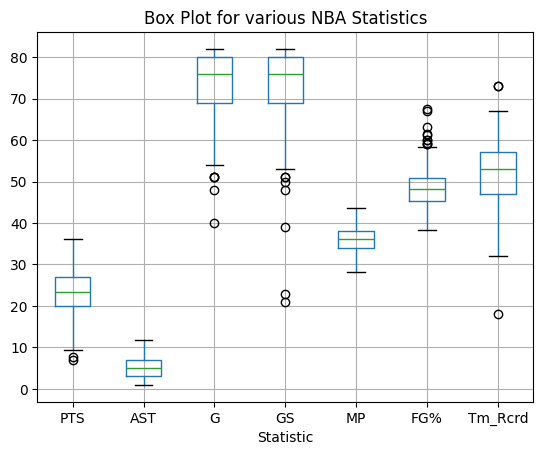

In [372]:
# filter out players who don't have any share of mvp votes
players_with_shares = total_data_df[total_data_df['MVP_Shr'] > 0]
players_with_shares.loc[:,'FG%'] = players_with_shares['FG%'] * 100 #Adjust for boxplot

# Create box plots for selected columns
players_with_shares.boxplot(column=['PTS', 'AST', 'G', 'GS', 'MP', 'FG%', 'Tm_Rcrd'])

# Set title and labels
plt.title('Box Plot for various NBA Statistics')
plt.xlabel('Statistic')

# Show the plot
plt.show()

#ToDo: feature scaling and possible normalization? Need to look into this


### Filtering players that will not win MVP
As showcased in the above box plot players must meet a certain minimum threshold to be consider for MVP. 

Some players, just based off of a single statistic, will confidently not win MVP. 

For example, Ben Wallace (6.9ppg) is the lowest scoring player to ever have an MVP share since 2000_01. Therefore we can filter out anyone with less ppg than him... and so on for other statistics

In [373]:
# find the minimum points per game
min_ppg = players_with_shares['PTS'].min()
print("min_ppg = ", min_ppg)

# find the minimum assists per game
min_apg = players_with_shares['AST'].min()
print("min_apg = ", min_apg)

# find the minimum number of games played
min_g = players_with_shares['G'].min()
print("min_g = ", min_g)

# find the minimum number of games started
min_gs = players_with_shares['GS'].min()
print("min_gs = ", min_gs)

# find the minimum number of minutes played
min_mp = players_with_shares['MP'].min()
print("min_mp = ", min_mp)

# find the minimum FG%
min_fg = players_with_shares['FG%'].min() / 100
print("min_fg = ", min_fg)

# find the worst record
min_tm_rcrd = players_with_shares['Tm_Rcrd'].min()
print("min_tm_rcrd = ", min_tm_rcrd)

# filter based on the minimum values
print ("Before filtering: ", total_data_df.shape)
total_data_df = total_data_df[(total_data_df['PTS'] >= min_ppg) & (total_data_df['AST'] >= min_apg) & (total_data_df['G'] >= min_g) & (total_data_df['GS'] >= min_gs) & (total_data_df['MP'] >= min_mp) & (total_data_df['Tm_Rcrd'] >= min_tm_rcrd) & (total_data_df['FG%'] >= min_fg)]
print ("After filtering: ", total_data_df.shape)

# total_data_df.head()


min_ppg =  6.9
min_apg =  1.0
min_g =  40
min_gs =  21
min_mp =  28.2
min_fg =  0.384
min_tm_rcrd =  18
Before filtering:  (9713, 58)
After filtering:  (2241, 58)


# Export Data


In [374]:
#Export Total Data DF as a csv
total_data_df.to_csv('output.csv', index=False)  # Set index=False to exclude index from the CSV file
